# STRAT - Short Tandem Repeat Analysis Tool

## 1. Plot various graphs on processed reads

In [1]:
from csv import QUOTE_NONE
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import seaborn as sns

## 2. Arguments

In [2]:
motif = 'CAG'

# pcr2persons guppy
# input_path = '/opt/data/workdir/pcr2persons.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/pcr2persons.guppy.ontarget.processed.'

# pcr2persons dorado
# input_path = '/opt/data/workdir/pcr2persons.dorado.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/pcr2persons.dorado.ontarget.processed.'

# jovan guppy
# input_path = '/opt/data/workdir/jovan.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/jovan.guppy.ontarget.processed.'

# jovan dorado
# input_path = '/opt/data/workdir/jovan.dorado.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/jovan.dorado.ontarget.processed.'

# dm108 guppy
# input_path = '/opt/data/workdir/dm108.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/dm108.guppy.ontarget.processed.'

# bc3_1 guppy
# input_path = '/opt/data/workdir/bc3_1.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc3_1.guppy.ontarget.processed.'

# bc3_1 dorado
# input_path = '/opt/data/workdir/bc3_1.dorado.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc3_1.dorado.ontarget.processed.'

# bc3_2 guppy
# input_path = '/opt/data/workdir/bc3_2.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc3_2.guppy.ontarget.processed.'

# bc3_2 dorado
# input_path = '/opt/data/workdir/bc3_2.dorado.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc3_2.dorado.ontarget.processed.'

# bc3_3 guppy
# input_path = '/opt/data/workdir/bc3_3.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc3_3.guppy.ontarget.processed.'

# bc3_3 dorado
# input_path = '/opt/data/workdir/bc3_3.dorado.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc3_3.dorado.ontarget.processed.'

# bc6_1 guppy
# input_path = '/opt/data/workdir/bc6_1.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_1.guppy.ontarget.processed.'

# bc6_2 guppy
# input_path = '/opt/data/workdir/bc6_2.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_2.guppy.ontarget.processed.'

# bc6_3 guppy
# input_path = '/opt/data/workdir/bc6_3.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_3.guppy.ontarget.processed.'

# bc6_4 guppy
# input_path = '/opt/data/workdir/bc6_4.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_4.guppy.ontarget.processed.'

# bc6_5 guppy
# input_path = '/opt/data/workdir/bc6_5.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_5.guppy.ontarget.processed.'

# bc6_6 guppy
# input_path = '/opt/data/workdir/bc6_6.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_6.guppy.ontarget.processed.'

# bc6_7 guppy
# input_path = '/opt/data/workdir/bc6_7.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_7.guppy.ontarget.processed.'

# bc6_8 guppy
# input_path = '/opt/data/workdir/bc6_8.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_8.guppy.ontarget.processed.'

# bc6_9 guppy
# input_path = '/opt/data/workdir/bc6_9.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_9.guppy.ontarget.processed.'

# bc6_10 guppy
# input_path = '/opt/data/workdir/bc6_10.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_10.guppy.ontarget.processed.'

# bc6_11 guppy
# input_path = '/opt/data/workdir/bc6_11.guppy.ontarget.processed.tsv'
# output_path = '/opt/data/workdir/images/bc6_11.guppy.ontarget.processed.'

# bc6_12 guppy
input_path = '/opt/data/workdir/bc6_12.guppy.ontarget.processed.tsv'
output_path = '/opt/data/workdir/images/bc6_12.guppy.ontarget.processed.'

## 3. Constants

In [3]:
COLORS = {
    'A': '#3DA853',  # green
    'C': '#4285F4',  # blue
    'G': '#F8BC07',  # yellow
    'T': '#EA4334',  # red
    ' ': 'white'
}

## 4. Functions

In [4]:
def prepare_for_plotting(df, col_seq, col_len, col_cnt, col_cov):
    results = []
    for i in range(df[col_len].max()):
        cond = df[col_len] >= i + 1
        row = dict(df[cond][col_seq].str[i].value_counts())
        
        cond = df[col_len] == i + 1
        row[col_cnt] = sum(cond)
        
        cond = df[col_len] >= i + 1
        row[col_cov] = sum(cond)
        
        results.append(row)
    
    result_df = pd.DataFrame(results).fillna(0).astype(int)
    return result_df


def plot(df, col_seq):
    output_image = f'{output_path}{col_seq}.png'
    col_len = 'len_' + col_seq
    col_cnt = 'cnt_' + col_seq
    col_cov = 'cov_' + col_seq
    
    cond = df['direction'] == 'fwd'
    cond &= df[col_len] <= 2400
    df_prep_fwd = prepare_for_plotting(df[cond][[col_seq, col_len]], col_seq, col_len, col_cnt, col_cov)

    cond = df['direction'] == 'rev'
    cond &= df[col_len] <= 2400
    df_prep_rev = prepare_for_plotting(df[cond][[col_seq, col_len]], col_seq, col_len, col_cnt, col_cov)

    colors = COLORS
    color_set = colors.keys()
    width = 24012
    height = 1002
    half = 500
    image = Image.new('RGB', (width, height), 'grey')
    draw = ImageDraw.Draw(image)
    reach_max = max(
        df_prep_fwd[col_cov].max(),
        df_prep_rev[col_cov].max()
    )
    for i in range(2400):
        x = i + 1
        N = 'CAG'[i%3]
        colors_ordered = sorted(color_set - set(N)) + [N]

        if i in df_prep_fwd.index:
            row = df_prep_fwd.iloc[i]
            # cnt = row[col_cnt]
            cov = row[col_cov]
            reach = half * cov / reach_max
            bottom = 500
            for j, n in enumerate(colors_ordered):
                if not n in row:
                    continue
                cnt = row[n]
                freq = int((reach * row[n] / cov).round())
                if j == len(colors_ordered) - 1:
                    color = 'black'
                else:
                    color = colors[n]
                draw.line([(10*x, bottom-freq), (10*x, bottom)], width=8, fill=color)
                bottom -= freq
    
        if i in df_prep_rev.index:
            row = df_prep_rev.iloc[i]
            # cnt = row[col_cnt]
            cov = row[col_cov]
            reach = half * cov / reach_max
            bottom = 502
            for j, n in enumerate(colors_ordered):
                if not n in row:
                    continue
                cnt = row[n]
                freq = int((reach * row[n] / cov).round())
                if j == len(colors_ordered) - 1:
                    color = 'black'
                else:
                    color = colors[n]
                draw.line([(10*x, bottom), (10*x, bottom+freq)], width=8, fill=color)
                bottom += freq
    
        if i % 3 == 0:
            draw.line([(10*i+5, 0), (10*i+5, height)], width=2, fill='#AAAAAA')
    
        if i % 30 == 0:
            draw.line([(10*i+5, 0), (10*i+5, height)], width=2, fill='white')

        if i % 300 == 0:
            draw.line([(10*i+5, 0), (10*i+5, height)], width=2, fill='black')

    image.save(output_image)

## 5. Tryouts

In [5]:
df = pd.read_csv(input_path, sep='\t')

In [6]:
cond = df['len_ins_ext_aln'] > 300
df = df[cond]

In [7]:
# plot(df, 'ins')
# plot(df, 'ins_aln')
# plot(df, 'ins_ext')
# plot(df, 'ins_ext_aln')

<Axes: xlabel='len_ins_ext_aln', ylabel='Count'>

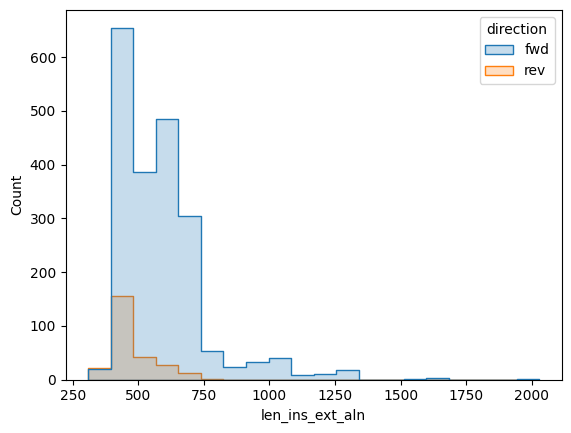

In [8]:
sns.histplot(data=df, x='len_ins_ext_aln', hue='direction', element="step", stat="count", common_norm=False, bins=20)

In [9]:
len(df)

2303

In [10]:
df['ins_ext_aln'] = df['ins_ext_aln'].str.replace('CAG', '___')

In [11]:
df.sort_values(['len_ins_ext_aln', 'ins_ext_aln'])[['ins_ext_aln', 'direction', 'id']].to_csv('bc6_12.ins_ext_aln.txt', index=False)